# Stock trading agent

## Data
We have a folder from https://www.kaggle.com/datasets/camnugent/sandp500 which includes the prices every market open day from 08-02-2013 to 08-02-2018 fro over 500 companies. These are companies in the S&P 500 and are the top 500 markets in the US, furthermore they represent the shares of the most commonly traded companies in the stock market.

The data has 5 columns for each company in its own file named by its stock name:
- Date: yy-mm-dd
- Open: price of stock at market open
- High: Highest price of stock in day
- Low: Lowest price of stock in day
- Close: Price of closing
- Volume: How many stocks traded that day for that company
- Name: The ticker name of the company in the stock market

In [1]:
from pathlib import Path

def count_files(directory_path):
    path = Path(directory_path)
    count = len([p for p in path.iterdir() if p.is_file()])
    return count

directory = 'individual_stocks_5yr'
file_count = count_files(directory)
print(f"Number of files in '{directory}': {file_count}")

Number of files in 'individual_stocks_5yr': 505


### Reading the data
Here we read the csv files for the first 100 companies and store the csv file in a panda dataframe and then store the 100 dataframes in a simple list.

In [4]:
# Schema: date | open | high | low | close | volume | name

# import os

# folder_path = 'individual_stocks_5yr'

# entries = os.listdir(folder_path)

# import pandas as pd

# stock_prices = []

# for i in range(100):
#     filename = folder_path + "/" + entries[i]
#     try:
#         df = pd.read_csv(filename)
#         stock_prices.append(df)
#     except:
#         print("Error: Error reading file (" + filename + ")")

# # A vector with the days for conveinience later
# calendar = stock_prices[0]['date']

# # print(len(stock_prices))


In [2]:
# Schema: date | open | high | low | close | volume | name

from pathlib import Path
import pandas as pd

def read_data(folder_path, amount = None):
    path = Path(folder_path)
    files = []

    for f in path.iterdir():
        if f.is_file() and f.suffix.lower() == '.csv':
            filename = f
            try:
                df = pd.read_csv(filename)
                files.append(df)
                if  amount:
                    amount -= 1
                    if amount == 0:
                        return files
            except:
                print("Error: Error reading file (" + filename + ")")

    return files

In [3]:
def inspect_data(comp_list):
    def check_for_na(comp_df):
        total_nas = comp_df.isna().sum().sum()
        uniform = True

        if total_nas != 0:
            print(f"Null values found. File: {comp_df.iat[0, 6]}. Count: {total_nas}")
            uniform = False
        return uniform

    def check_dfs_na(comp_list):
        print("Checking for null values:")
        if comp_list:
            for df in comp_list:
                unifrom = check_for_na(df)
        else:
            print("Error: No dataframes in comp_list!")
    def check_length(comp_list):
        print("Checking sizes:")
        default_shape = comp_list[0].shape
        uniform = True

        for i, df in enumerate(comp_list):
            if df.shape != default_shape:
                print(f"Unequal size detected. Deffault: {default_shape}. Detected size: {df.shape} in file {df.iat[0, 6]}")
                uniform = False
        if uniform:
            print("All dfs same shape")            

    def check_dates(comp_list):
        print("Checking for unequal dates:")
        calendar = comp_list[0]['date']
        uniform = True

        for i, df in enumerate(comp_list):
            if not df['date'].equals(calendar):
                print(f"Unequal dates detected for file {df.iat[0, 6]}")
                uniform = False
        if uniform:
            print('All dates are equal')
    
    if not comp_list or len(comp_list) <= 1:
            return
    
    check_dfs_na(comp_list)
    check_length(comp_list)
    check_dates(comp_list)

The above code shows that there are indeed Null values and unequal data for some companies in our dataset.

In [4]:
def clean_data(comp_list):
    if not comp_list or len(comp_list) == 0:
        print("Error: Input empty")
        return
    
    print("Cleaning dataframes from NaNs")
    counter = 0
    clean_list = []

    for df in comp_list:
        if df.isnull().values.any():
            print(f"NaNs detected in {df.iat[0, 6]}, will be dropped")
            counter += 1
        else:
            clean_list.append(df)

    print(f"NaN dataframes dropped {counter}, will equalize length now.")

    min_days = 730
    valid_companies = [df for df in clean_list if df.shape[0] >= min_days]

    date_sets = [set(df['date']) for df in valid_companies]

    common_dates = set.intersection(*date_sets)

    aligned_dfs = [
        df[df['date'].isin(common_dates)].sort_values('date').reset_index(drop=True)
        for df in valid_companies
    ]

    return aligned_dfs


In [5]:
comp_list = (read_data(folder_path='individual_stocks_5yr', amount=505))
inspect_data(comp_list)

Checking for null values:
Null values found. File: WRK. Count: 3
Null values found. File: FTV. Count: 3
Null values found. File: ES. Count: 1
Null values found. File: UA. Count: 3
Null values found. File: DHR. Count: 4
Null values found. File: O. Count: 4
Null values found. File: VRTX. Count: 3
Null values found. File: BHF. Count: 3
Null values found. File: REGN. Count: 3
Checking sizes:
Unequal size detected. Deffault: (1259, 7). Detected size: (975, 7) in file GOOG
Unequal size detected. Deffault: (1259, 7). Detected size: (781, 7) in file QRVO
Unequal size detected. Deffault: (1259, 7). Detected size: (1063, 7) in file ALLE
Unequal size detected. Deffault: (1259, 7). Detected size: (1257, 7) in file ORCL
Unequal size detected. Deffault: (1259, 7). Detected size: (917, 7) in file INFO
Unequal size detected. Deffault: (1259, 7). Detected size: (1257, 7) in file BMY
Unequal size detected. Deffault: (1259, 7). Detected size: (1197, 7) in file IQV
Unequal size detected. Deffault: (1259, 

In [6]:
clean_list = clean_data(comp_list)
inspect_data(clean_list)
comp_count = len(clean_list)
print(f"We now have: {len(clean_list)}")

Cleaning dataframes from NaNs
NaNs detected in WRK, will be dropped
NaNs detected in FTV, will be dropped
NaNs detected in ES, will be dropped
NaNs detected in UA, will be dropped
NaNs detected in DHR, will be dropped
NaNs detected in O, will be dropped
NaNs detected in VRTX, will be dropped
NaNs detected in BHF, will be dropped
NaNs detected in REGN, will be dropped
NaN dataframes dropped 9, will equalize length now.
Checking for null values:
Checking sizes:
All dfs same shape
Checking for unequal dates:
All dates are equal
We now have: 484


In [7]:
print(f"We now have data for {clean_list[0].shape[0]} days")

We now have data for 781 days


Now all our data for all chosen companies are equal.

In [8]:
def simulate_market_at_day(num_days, trading_budget, risk, start_day, n, threshold):
    # A dict to store all purchases, using stock name as key, and list of lists as values.
    # Where each list would store [amout of shares bought, purchase price, date of purchase]
    purchases = {}
    purchase_history = {}
    sells = {}
    budget = trading_budget
    max_purchase = 100
    fee_rate = 0.001

    total_sells = 0
    total_buys = 0
    total_fees = 0.0

    def calc_momentum(comp_df, curr, n):
        price_n_ago = comp_df.iat[curr - n, 1]

        curr_price = comp_df.iat[curr, 1]
                
        return (curr_price - price_n_ago) / price_n_ago

    def buy_amount(comp_df, curr, momentum):
        curr_price = comp_df.iat[curr, 1]
        date = comp_df.iat[curr, 0]

        momentum_risk = risk * (1 + min(momentum, 0.05) / 0.05)

        amount_of_shares = (momentum_risk * budget) / curr_price
        if amount_of_shares * curr_price > max_purchase:
            amount_of_shares = max_purchase / curr_price
        return  [amount_of_shares, curr_price, date]

    def make_purchase(comp_df, curr, momentum):
        nonlocal budget, total_buys, total_fees
        stock_name = comp_df.iat[0, 6]
        purchase_record = buy_amount(comp_df, curr, momentum)

        if stock_name in purchases and purchases[stock_name]:
            purchases[stock_name].append(purchase_record)
        else:
            purchases[stock_name] = [purchase_record, ]
        trade_value = purchase_record[0] * purchase_record[1]
        fee = trade_value * fee_rate
        total_fees += fee
        budget -= trade_value + fee
        total_buys += 1

    def make_sell_record(stock_name, purchase_records, total_amount):
        if stock_name in purchase_history:
            for record in purchase_records:
                purchase_history[stock_name].append(record)
        else:
            purchase_history[stock_name] = purchase_records
        if stock_name in sells:
            sells[stock_name].append(total_amount)
        else:
            sells[stock_name] = [total_amount, ]

    def sell_shares(stock_name, curr_price):
        nonlocal budget, total_sells, total_fees, fee_rate
        purchase_records = purchases[stock_name]
        total_amount = 0
        for record in purchase_records:
            total_amount += curr_price * record[0]
        fee = total_amount * fee_rate
        total_fees += fee
        budget += total_amount - fee
        make_sell_record(stock_name, purchase_records, total_amount)
        del purchases[stock_name]
        total_sells += 1
        
    def make_sell(comp_df, curr):
        stock_name = comp_df.iat[0, 6]
        curr_price = comp_df.iat[curr, 1]

        if stock_name in purchases and purchases[stock_name]:
            sell_shares(stock_name, curr_price)

    def movement_decision(comp_df, curr, n):
        momentum = calc_momentum(comp_df=comp_df, curr=curr, n=n)
        if momentum > threshold:
            make_purchase(comp_df, curr, momentum)
        elif momentum < -threshold:
            make_sell(comp_df, curr)
    
    def sell_all_shares():
        nonlocal budget
        nonlocal total_fees, total_sells, fee_rate

        for stock_name, buys in purchases.items():
            unrealized = 0
            comp_df = next(df for df in clean_list if df.iat[0, 6] == stock_name)
            curr_price = comp_df.iat[(end_day - 1), 4]

            for qty, _, _ in buys:
                unrealized += qty * curr_price
            fee = unrealized * fee_rate
            total_fees += fee

            make_sell_record(stock_name, buys, unrealized)
            budget += unrealized - fee

            total_sells += 1
    
    end_day = num_days + start_day
    for i in range(start_day, end_day - 1, 1):
        if i - start_day < n:
            continue
        for j in range(len(clean_list)):
            movement_decision(clean_list[j], i, n)

    sell_all_shares()

    initial_budget = trading_budget

    profit = budget - initial_budget

    return {
        "num_days": num_days,
        "risk": risk,
        "n": n,
        "threshold": threshold,
        "initial_budget": initial_budget,
        "final_value": budget,
        "total_buys": total_buys,
        "total_sells": total_sells,
        "total_fees": total_fees,
        "profit": profit,
    }


In [9]:
def print_table(stats):
    keys = [
        "num_days",
        "risk",
        "n",
        "threshold",
        "initial_budget",
        "final_value",
        "total_buys",
        "total_sells",
        "total_fees",
        "profit",
    ]

    integer_keys = {"num_days", "n", "total_buys", "total_sells"}
    
    rows = []

    for key in keys:
        if key in stats:
            value = stats[key]

            if isinstance(value, (int, float)):
                if key in integer_keys:
                    formatted_value = "{:.0f}".format(value)
                else:
                    formatted_value = "{:.2f}".format(value)
            else:
                formatted_value = value
                
            rows.append({"Metric" : key, "Value" : formatted_value})
            
    df = pd.DataFrame(rows)
    print(df.to_string(index=False))
    

In [10]:
def experiment1():
    for n in [3, 5, 10, 20]:
        stats = simulate_market_at_day(730, 5000, 0.05, 0, n, 0.01)
        print_table(stats)
        print()

def experiment2():
    for n in [3, 5, 10, 20]:
        stats = simulate_market_at_day(730, 5000, 0.05, 0, n, 0.02)
        print_table(stats)
        print()

def experiment6():
    for n in [3, 5, 10, 20]:
        stats = simulate_market_at_day(730, 5000, 0.05, 0, n, 0.1)
        print_table(stats)
        print()

def experiment7():
    for n in [3, 5, 10, 20]:
        stats = simulate_market_at_day(730, 5000, 0.05, 0, n, 0.2)
        print_table(stats)
        print()

def experiment3():
    for n in [3, 5, 10, 20]:
        stats = simulate_market_at_day(364, 5000, 0.05, 0, n, 0.01)
        print_table(stats)
        print()


def experiment4():
    for n in [3, 5, 10, 20]:
        stats = simulate_market_at_day(364, 5000, 0.05, 0, n, 0.02)
        print_table(stats)
        print()


def experiment5():
    for n in [3, 5, 10, 20]:
        stats = simulate_market_at_day(364, 5000, 0.05, 0, n, 0.2)
        print_table(stats)
        print()

def experiment8():
    stats = simulate_market_at_day(364, 5000, 0.05, 364, 20, 0.2)
    print_table(stats)
    print()

def experiment9():
    stats = simulate_market_at_day(364, 5000, 0.05, 364, 20, 0.1)
    print_table(stats)
    print()

In [182]:
experiment3()

        Metric   Value
      num_days     364
          risk    0.05
             n       3
     threshold    0.01
initial_budget 5000.00
   final_value 4407.16
    total_buys   59042
   total_sells   14341
    total_fees  521.33
        profit -592.84

        Metric   Value
      num_days     364
          risk    0.05
             n       5
     threshold    0.01
initial_budget 5000.00
   final_value 4322.06
    total_buys   66466
   total_sells   11555
    total_fees  405.23
        profit -677.94

        Metric   Value
      num_days     364
          risk    0.05
             n      10
     threshold    0.01
initial_budget 5000.00
   final_value 4495.63
    total_buys   73798
   total_sells    7690
    total_fees  275.33
        profit -504.37

        Metric   Value
      num_days     364
          risk    0.05
             n      20
     threshold    0.01
initial_budget 5000.00
   final_value 4719.52
    total_buys   75824
   total_sells    5224
    total_fees  174.54
        

In [169]:
experiment4()

        Metric   Value
      num_days     364
          risk    0.05
             n       3
     threshold    0.02
initial_budget 5000.00
   final_value 4743.44
    total_buys   34168
   total_sells    8874
    total_fees  310.48
        profit -256.56

        Metric   Value
      num_days     364
          risk    0.05
             n       5
     threshold    0.02
initial_budget 5000.00
   final_value 4453.94
    total_buys   45152
   total_sells    7939
    total_fees  265.25
        profit -546.06

        Metric   Value
      num_days     364
          risk    0.05
             n      10
     threshold    0.02
initial_budget 5000.00
   final_value 4524.65
    total_buys   57943
   total_sells    5643
    total_fees  202.53
        profit -475.35

        Metric   Value
      num_days     364
          risk    0.05
             n      20
     threshold    0.02
initial_budget 5000.00
   final_value 4703.41
    total_buys   65224
   total_sells    3674
    total_fees  135.70
        

In [171]:
experiment5()

        Metric   Value
      num_days     364
          risk    0.05
             n       3
     threshold    0.20
initial_budget 5000.00
   final_value 5151.09
    total_buys      93
   total_sells      39
    total_fees   12.71
        profit  151.09

        Metric   Value
      num_days     364
          risk    0.05
             n       5
     threshold    0.20
initial_budget 5000.00
   final_value 4911.20
    total_buys     234
   total_sells      76
    total_fees   15.58
        profit  -88.80

        Metric   Value
      num_days     364
          risk    0.05
             n      10
     threshold    0.20
initial_budget 5000.00
   final_value 5499.45
    total_buys     606
   total_sells     129
    total_fees   23.73
        profit  499.45

        Metric   Value
      num_days     364
          risk    0.05
             n      20
     threshold    0.20
initial_budget 5000.00
   final_value 6222.83
    total_buys    1665
   total_sells     233
    total_fees   23.79
        

In [185]:
experiment8()

        Metric   Value
      num_days     364
          risk    0.05
             n      20
     threshold    0.20
initial_budget 5000.00
   final_value 6147.06
    total_buys    1445
   total_sells     171
    total_fees   15.20
        profit 1147.06



In [140]:
experiment1()

        Metric   Value
      num_days     734
          risk    0.05
             n       3
     threshold    0.01
initial_budget 5000.00
   final_value 4640.70
    total_buys  116166
   total_sells   27372
    total_fees  952.85
        profit -359.30

        Metric   Value
      num_days     734
          risk    0.05
             n       5
     threshold    0.01
initial_budget 5000.00
   final_value 4565.70
    total_buys  133813
   total_sells   21920
    total_fees  744.61
        profit -434.30

        Metric   Value
      num_days     734
          risk    0.05
             n      10
     threshold    0.01
initial_budget 5000.00
   final_value 5243.36
    total_buys  152676
   total_sells   14885
    total_fees  517.77
        profit  243.36

        Metric   Value
      num_days     734
          risk    0.05
             n      20
     threshold    0.01
initial_budget 5000.00
   final_value 5730.04
    total_buys  166535
   total_sells   10155
    total_fees  324.46
        

In [164]:
experiment7()

        Metric   Value
      num_days     734
          risk    0.05
             n       3
     threshold    0.20
initial_budget 5000.00
   final_value 6116.09
    total_buys     136
   total_sells      59
    total_fees   14.98
        profit 1116.09

        Metric   Value
      num_days     734
          risk    0.05
             n       5
     threshold    0.20
initial_budget 5000.00
   final_value 6432.58
    total_buys     362
   total_sells     106
    total_fees   18.86
        profit 1432.58

        Metric   Value
      num_days     734
          risk    0.05
             n      10
     threshold    0.20
initial_budget 5000.00
   final_value 8150.53
    total_buys    1020
   total_sells     183
    total_fees   27.06
        profit 3150.53

        Metric   Value
      num_days     734
          risk    0.05
             n      20
     threshold    0.20
initial_budget 5000.00
   final_value 7609.02
    total_buys    3184
   total_sells     335
    total_fees   28.41
        

In [10]:
# Baseline method
def baseline_invest(trading_budget=5000, num_days = 100, start_day = 0):
    if not clean_list:
        print("Error: clean_list is empty.")
        return

    per_company_budget = trading_budget / len(clean_list)

    total_portfolio_value = 0

    total_fees = 0.0

    fee_rate = 0.001

    end_day = num_days + start_day

    for comp in clean_list:
        start_price = comp.iat[start_day, 4]
        end_price = comp.iat[end_day - 1, 4]

        buy_fees = fee_rate * per_company_budget
        total_fees += buy_fees

        buy = per_company_budget - buy_fees

        shares = buy / start_price

        sell_fee = shares * end_price * fee_rate

        total_fees += sell_fee

        position_value = shares * end_price - sell_fee
        total_portfolio_value += position_value

    profit = total_portfolio_value - trading_budget

    print(f"Baseline final portfolio value: {total_portfolio_value}")
    print(f"Baseline profit: {profit}")
    print(f"num_days = {num_days}")
    print(f"total operations = {len(clean_list) * 2}")
    print(f"Total fees paid: {total_fees}")

    return total_portfolio_value

In [16]:
baseline_invest(5000, 364)

Baseline final portfolio value: 5122.487089285224
Baseline profit: 122.4870892852241
num_days = 364
total operations = 968
Total fees paid: 10.127614703989252


5122.487089285224

In [17]:
baseline_invest(5000, 364, 364)

Baseline final portfolio value: 6247.500708723693
Baseline profit: 1247.5007087236927
num_days = 364
total operations = 968
Total fees paid: 11.253754463186933


6247.500708723693

In [189]:
baseline_invest(5000, 734)

Baseline final portfolio value: 6510.888153149127
Baseline profit: 1510.888153149127
num_days = 734
total operations = 968
Total fees paid: 11.517405558707893


6510.888153149127

Experiment training on year 1 then test on year 2, trade for 1 year or 364 days.

In [ ]:
# https://medium.com/@taeefnajib/hyperparameter-tuning-using-optuna-c46d7b29a3e

import optuna
import matplotlib.pyplot as plt



TEST_START = 364
TEST_DAYS = 364

TRADING_BUDGET = 5000
RISK = 0.05

def run_agent_optimize(start_day = 0, num_days = 100, budget = 5000, risk = 0.05):
    optuna.logging.set_verbosity(optuna.logging.WARNING)

    def objective(trial):
        n = trial.suggest_int("n", 5, 50)
        threshold = trial.suggest_float("threshold", 0.01, 0.3)

        stats = simulate_market_at_day(
            num_days=num_days,
            trading_budget=budget,
            risk=risk,
            start_day=start_day,
            n=n,
            threshold=threshold
        )

        return stats["profit"]
    
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    ax = optuna.visualization.matplotlib.plot_optimization_history(study)
    ax.set_title("Optuna Optimization History")
    plt.show()

    # print("Best params:", study.best_params)
    # print("Best train objective profit:", study.best_value)

    best_n = study.best_params["n"]
    best_threshold = study.best_params["threshold"]

    test_stats = simulate_market_at_day(
    num_days=TEST_DAYS,
    trading_budget=TRADING_BUDGET,
    risk=RISK,
    start_day=TEST_START,
    n=best_n,
    threshold=best_threshold
    )

    print("\n=== Unseen Year Results ===")
    print_table(test_stats)
    print()

In [14]:
baseline_train = baseline_invest(5000, 364, 0)
baseline_test  = baseline_invest(5000, 364, 364)

best_n = 20
best_threshold = 0.2

agent_train = simulate_market_at_day(364, 5000, 0.05, 0, best_n, best_threshold)
agent_test  = simulate_market_at_day(364, 5000, 0.05, 364, best_n, best_threshold)

comparison = pd.DataFrame([
    ("Baseline", "Train", baseline_train, baseline_train - 5000),
    ("Baseline", "Test",  baseline_test,  baseline_test - 5000),
    ("Agent", "Train", agent_train["final_value"], agent_train["profit"]),
    ("Agent", "Test",  agent_test["final_value"],  agent_test["profit"]),
], columns=["Strategy", "Period", "Final Value", "Profit"])

comparison



Baseline final portfolio value: 5122.487089285224
Baseline profit: 122.4870892852241
num_days = 364
total operations = 968
Total fees paid: 10.127614703989252
Baseline final portfolio value: 6247.500708723693
Baseline profit: 1247.5007087236927
num_days = 364
total operations = 968
Total fees paid: 11.253754463186933


,Strategy,Period,Final Value,Profit
0,Baseline,Train,5122.487089,122.487089
1,Baseline,Test,6247.500709,1247.500709
2,Agent,Train,6222.827780,1222.827780
3,Agent,Test,6147.061167,1147.061167


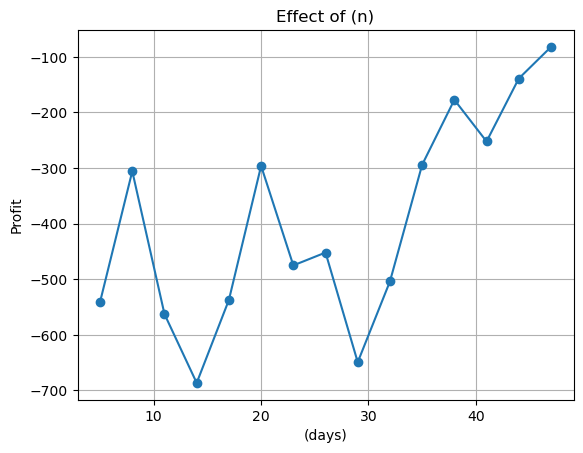

In [18]:
results = []

for n in range(5, 50, 3):
    stats = simulate_market_at_day(364, 5000, 0.05, 0, n, 0.02)
    results.append((n, stats["profit"]))

df_n = pd.DataFrame(results, columns=["n", "Profit"])

plt.figure()
plt.plot(df_n["n"], df_n["Profit"], marker='o')
plt.title("Effect of (n)")
plt.xlabel("(days)")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

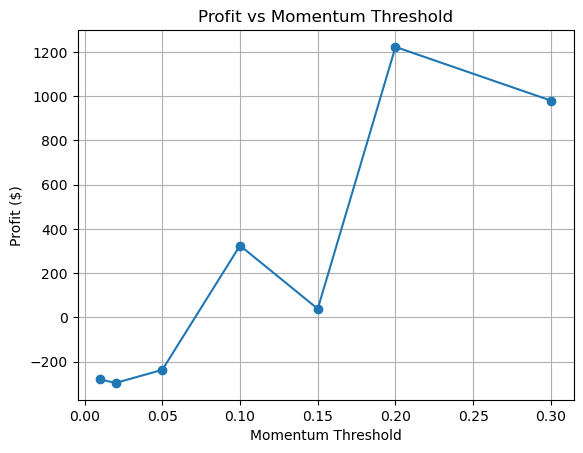

In [20]:
results = []

for t in [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3]:
    stats = simulate_market_at_day(364, 5000, 0.05, 0, 20, t)
    results.append((t, stats["profit"]))

df_t = pd.DataFrame(results, columns=["Threshold", "Profit"])

plt.figure()
plt.plot(df_t["Threshold"], df_t["Profit"], marker='o')
plt.title("Profit vs Momentum Threshold")
plt.xlabel("Momentum Threshold")
plt.ylabel("Profit ($)")
plt.grid(True)
plt.show()


In [21]:
run_agent_optimize(num_days=364)

[I 2025-12-16 19:10:33,489] A new study created in memory with name: no-name-f8788f37-b3c5-479e-b16a-69260211a0c6
[I 2025-12-16 19:10:41,437] Trial 0 finished with value: 126.19873287793507 and parameters: {'n': 46, 'threshold': 0.1702394567405675}. Best is trial 0 with value: 126.19873287793507.
[I 2025-12-16 19:10:48,835] Trial 1 finished with value: -328.501986668437 and parameters: {'n': 15, 'threshold': 0.1440027147108758}. Best is trial 0 with value: 126.19873287793507.
[I 2025-12-16 19:10:53,158] Trial 2 finished with value: 696.88710899536 and parameters: {'n': 15, 'threshold': 0.20167895156642648}. Best is trial 2 with value: 696.88710899536.
[I 2025-12-16 19:11:06,271] Trial 3 finished with value: -469.40419257838585 and parameters: {'n': 25, 'threshold': 0.02162959955092641}. Best is trial 2 with value: 696.88710899536.
[I 2025-12-16 19:11:18,085] Trial 4 finished with value: -541.7842990494764 and parameters: {'n': 21, 'threshold': 0.02949776838396588}. Best is trial 2 with

Best params: {'n': 20, 'threshold': 0.23265096922210654}
Best train objective value: 1480.8979759326385

=== Unseen (Test) Year Results ===
        Metric   Value
      num_days     364
          risk    0.05
             n      20
     threshold    0.23
initial_budget 5000.00
   final_value 6672.18
    total_buys     795
   total_sells     102
    total_fees   15.52
        profit 1672.18
